In [1]:
import os
import sys
import fitsio
import numpy             as np
import pylab             as pl
import matplotlib.pyplot as plt
import astropy.io.fits   as fits

In [2]:
sys.path.append('{}'.format(os.environ['HOME']))
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [3]:
import pubplot

from schechter     import schechter, named_schechter
from gama_limits   import gama_field
from delta8_limits import d8_limits, delta8_tier
from findfile      import findfile, fetch_fields
from lumfn         import multifield_lumfn
from astropy.table import Table

In [4]:
n8 = Table.read(findfile(ftype='ddp_n8'))
n8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],RANDSEP,RANDMATCH,BOUND_DIST,rFILLFACTOR,RAND_N8,FILLFACTOR,FILLFACTOR_VMAX,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,float64,float64,int64,int64,int64,float64,int64
511539,587729972322697460,214.65138945,-1.26244731,19.22709,0.21299,4,G15_Y2_018_119,6,21.799599,20.321333,19.234184,18.83978,18.619904,0.21299,741.985077739468,39.35197585577133,G15,0,0,-503.07799319557733,-347.716625921488,-13.477005996895029,505.4752638051222,344.2002878348133,-14.03098022690156,1.0871487,19.22709,0.8086178701231479,0,5,0.018679356934780414,0.2972101531934684,0.2474002569437906,0.6383965560818761,0.6961523672437504,0.8,-0.20660031,-0.170392,-20.165684968725557,-20.201893270508165,-20.37228527714383,39.392775804296846,39.59937611271512,39.428984106079454,-0.03863336278907192,0.18086409396626874,0.1780915155731292,0.446039383679932,-20.096376227354895,0.5729084,0.2665731978582776,0.0,-7.227091,0.009106507174940848,0.0,7920297.825821957,0 .. 0,1 .. 0,0.18718172684719975,291772,7.9394809485149755,1.000624524320062,8589,1.0012073671231376,0.6615082230063117,14,0,0,0.06868497030372223,4
543782,588848898853306634,212.80316169,-0.85068564,18.942377,0.12733,4,G15_Y1_AS2_053,6,20.596775,19.494383,18.941788,18.558931,18.344885,0.12733,419.71052031641017,38.11474927610395,G15,0,0,-312.90145419811347,-201.67566528542397,-5.527506717228115,314.2938540355614,199.4889490774735,-5.871954492324867,0.55259514,18.942377,0.5131182450006609,0,3,-0.09132326600119958,-0.05184637245205577,0.11015824472168587,0.1822772556802188,0.4804761275912718,2.12,-0.12351011,-0.2699396,-19.1590203229735,-19.012590828950177,-19.282530430371533,38.101397413427605,38.22490752082564,37.95496791940428,-0.08444510672178197,-0.04225916109795453,0.13227977164041915,0.22291612861570875,-19.181141849892235,0.85762215,0.1913895729437075,0.0,-6.942377,0.005302184033912462,0.0,3077363.701860444,0 .. 0,1 .. 0,1.0269597530957804,310029,8.010121729845281,1.0,8519,0.9930475678800802,0.555224250737686,41,51,0,2.155436952756741,6
545289,588848898855928239,218.81656784,-0.85252611,19.100044,0.08221,4,G15_Y2_016_302,6,20.637308,19.540102,19.020603,18.838081,18.72613,0.08221,262.51613577965895,37.0957800142279,G15,2,0,-188.98234675775922,-152.03570193556519,-3.609221314893947,190.03380429897064,150.71426123865166,-3.8174874666304404,0.5194988,19.100044,0.5399353906781562,0,4,-0.11512715342608892,-0.13556371903100292,0.0909023727488997,0.10782449157590746,0.5025767062462344,2.12,-0.0797437,-0.17428519,-18.00689443824919,-17.91235294817122,-18.086638136488517,37.10693868873747,37.1866823869768,37.0123971986595,-0.11797420340339465,-0.1398714023379835,0.09875067495880646,0.12530388737567977,-18.0147427404591,0.699955,0.11342272155089571,0.0,-7.100044

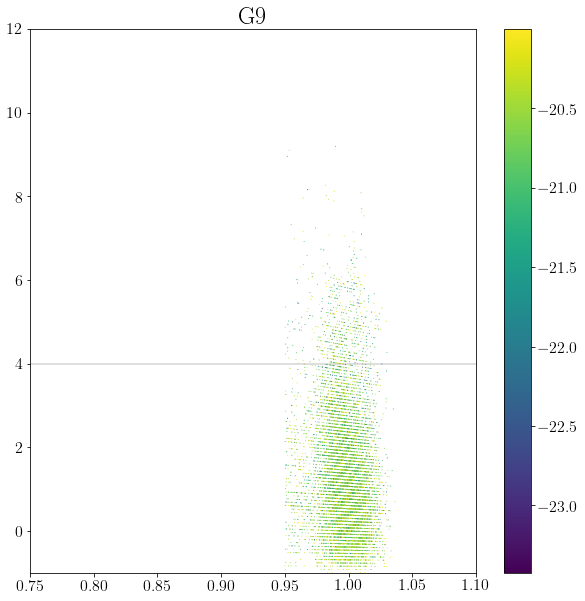

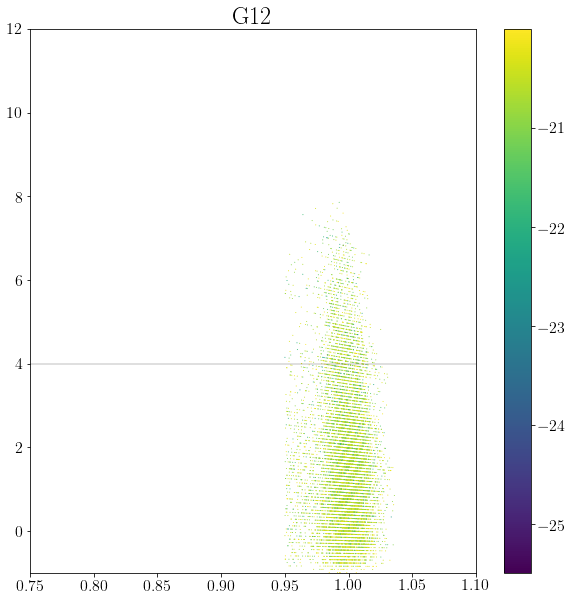

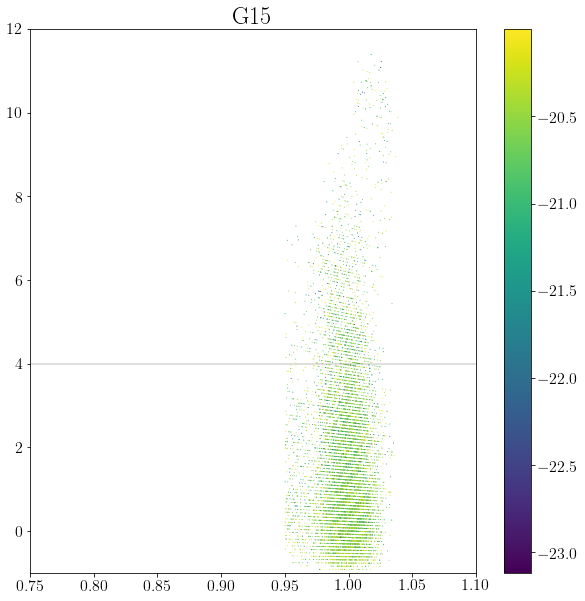

In [5]:
for field in ['G9', 'G12', 'G15']:
    isin = (n8['FIELD'] == field) & (n8['MCOLOR_0P0'] < -20.)

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    pl.sca(ax)
    pl.clf()
    pl.axhline(4., c='k', lw=0.25)
    pl.scatter(n8['FILLFACTOR'][isin], n8['DDP1_DELTA8'][isin], marker='.', lw=0.0, c=n8['MCOLOR_0P0'][isin], s=4)
    pl.xlim(0.75,1.1)
    pl.ylim(-1., 12.)
    pl.title(field)
    pl.colorbar()
    pl.show()

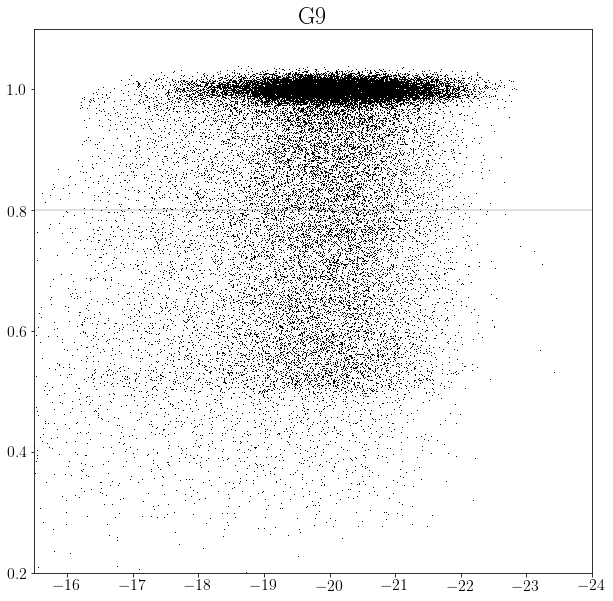

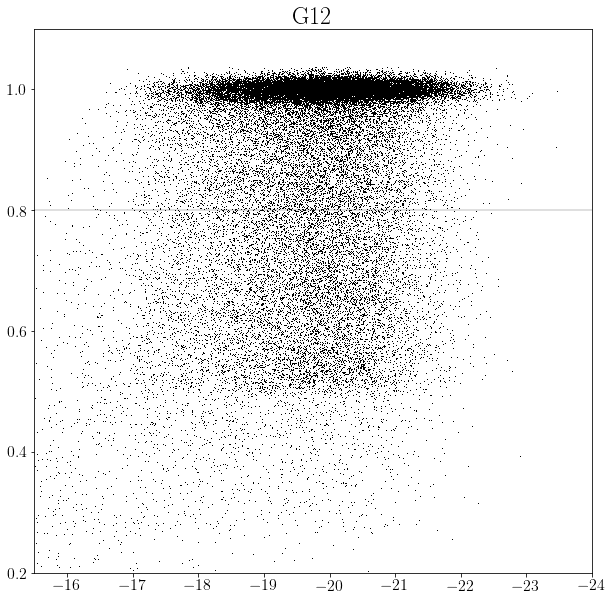

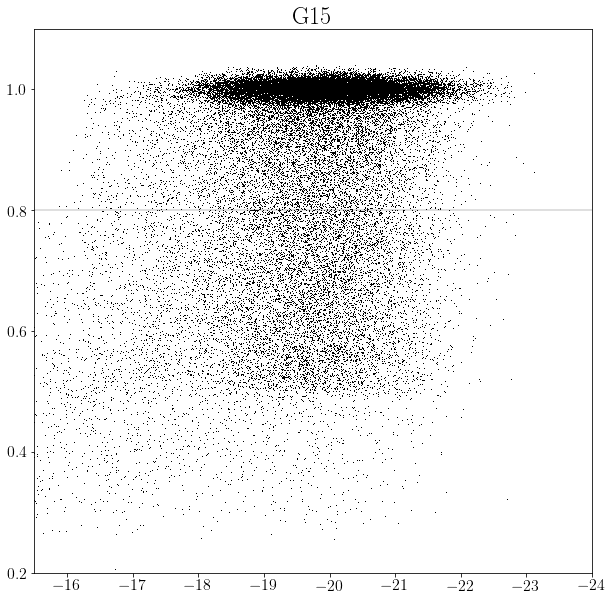

In [6]:
for field in ['G9', 'G12', 'G15']:
    isin = n8['FIELD'] == field

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    pl.sca(ax)
    pl.clf()
    pl.axhline(0.8, c='k', lw=0.25)
    pl.plot(n8['MCOLOR_0P0'][isin], n8['FILLFACTOR'][isin], marker=',', lw=0.0, c='k')
    pl.xlim(-15.5,-24.)
    pl.ylim(0.2, 1.1)
    pl.title(field)
    pl.show()

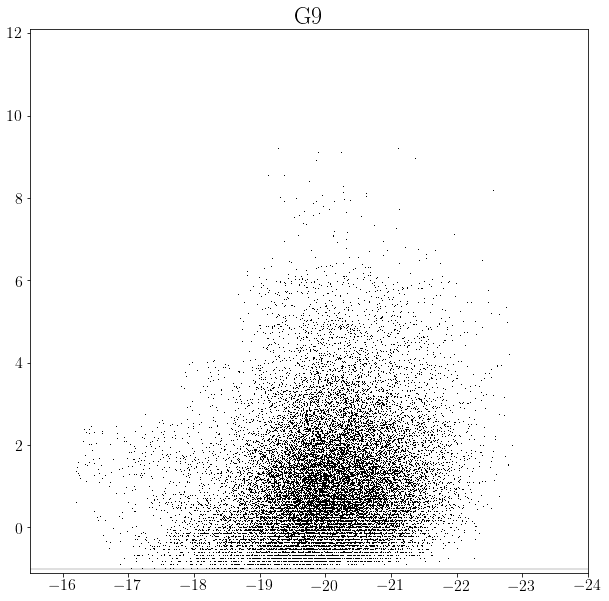

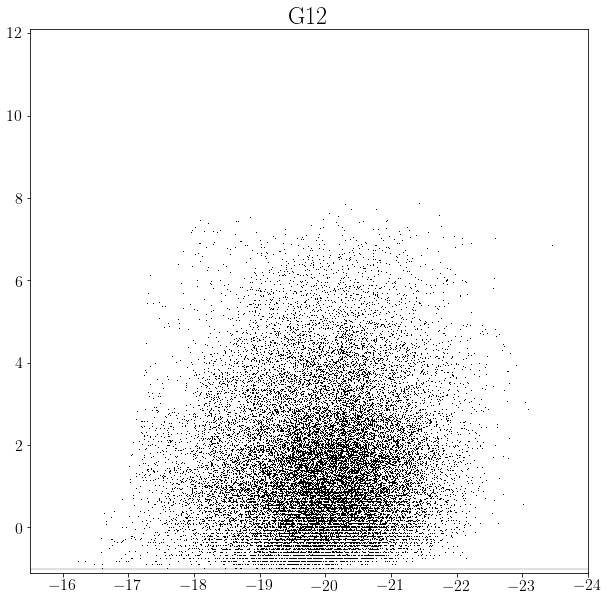

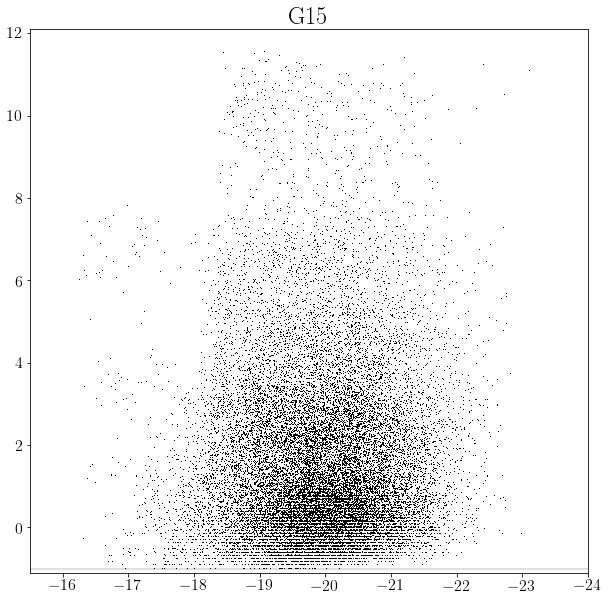

In [7]:
for field in ['G9', 'G12', 'G15']:
    isin = n8['FIELD'] == field

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    pl.sca(ax)
    pl.clf()
    pl.axhline(-1., c='k', lw=0.25)
    pl.plot(n8['MCOLOR_0P0'][isin], n8['DDP1_DELTA8'][isin], marker=',', lw=0.0, c='k')
    pl.xlim(-15.5, -24.)
    pl.ylim(-1.1, 12.1)
    pl.title(field)
    pl.show()

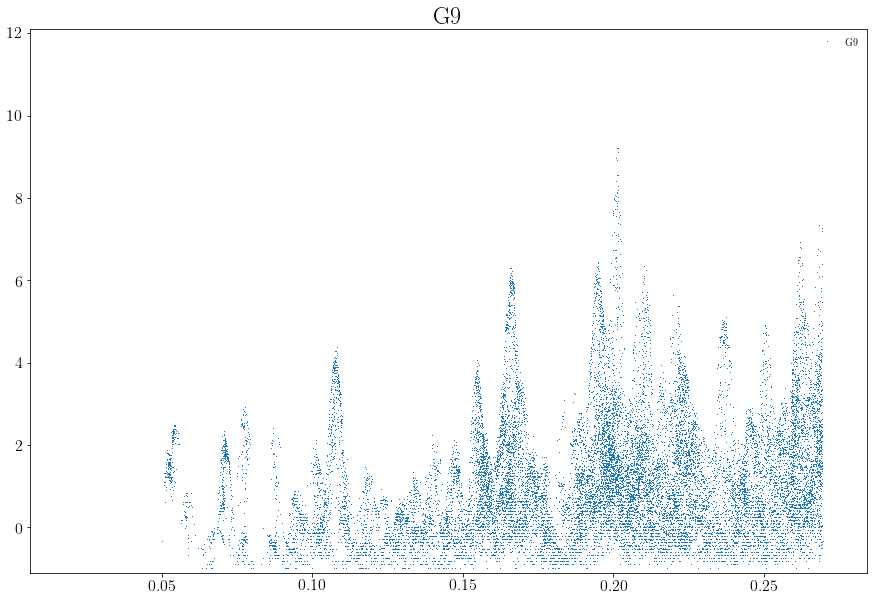

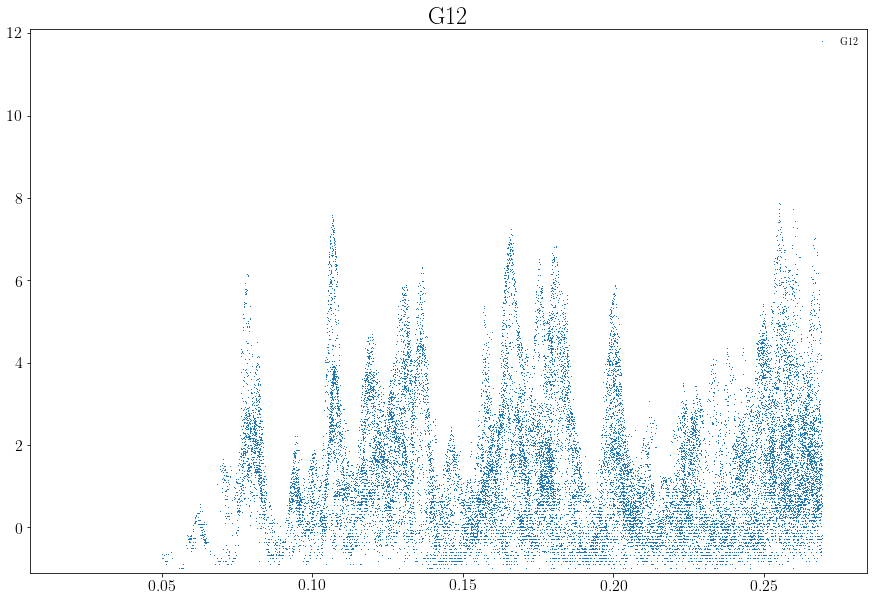

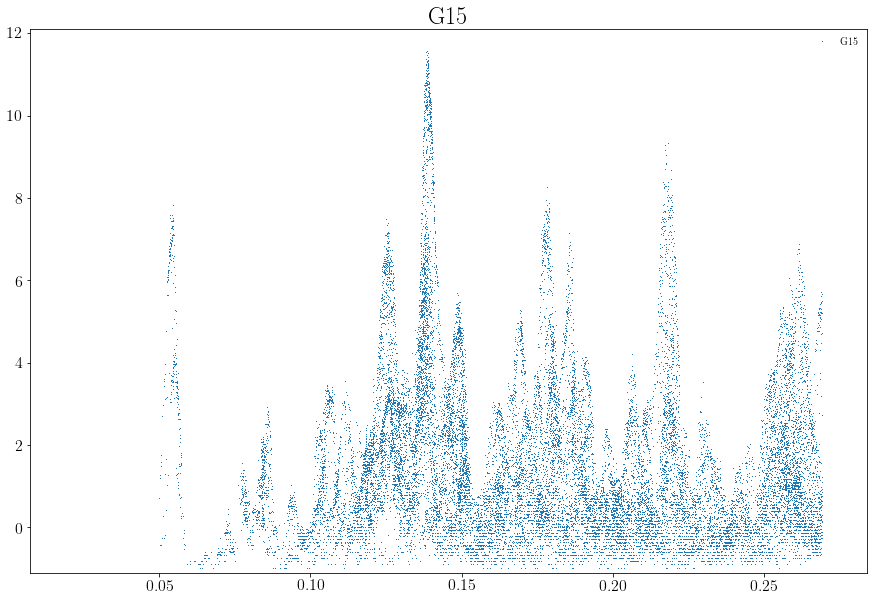

In [8]:
for field in ['G9', 'G12', 'G15']:
    isin = n8['FIELD'] == field

    fig, ax = plt.subplots(1,1,figsize=(15,10))
    
    pl.sca(ax)
    
    pl.plot(n8['ZSURV'][isin], n8['DDP1_DELTA8'][isin], marker=',', lw=0.0, label=field)
    pl.ylim(-1.1, 12.1)
    pl.title(field)
    pl.legend(frameon=False)

# Done.